# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Infinite Strip Radar Cross Section
***

Referring to Section 7.4.1.1, consider the geometry of an infinitely long conducting strip of width $w$, illustrated in Figure 7.6. The two-dimensional bistatic radar cross section for the TMz polarization is given by (Equation 7.15)

$$
    \sigma_{2D} = \frac{2\pi w^2}{\lambda}\Bigg[ \sin\phi_i \Bigg( \frac{\sin\big( {0.5\, k w (\cos\phi_o + \cos\phi_i} \big)}{0.5\, k w (\cos\phi_o + \cos\phi_i}\Bigg)\Bigg]^2 \hspace{0.5in} \text{(m)},
$$

The two-dimensional bistatic radar cross section for the TEz polarization is given by (Equation 7.18)

$$
    \sigma_{2D} = \frac{2\pi w^2}{\lambda}\Bigg[ \sin\phi_o \Bigg( \frac{\sin\big( {0.5\, k w (\cos\phi_o + \cos\phi_i} \big)}{0.5\, k w (\cos\phi_o + \cos\phi_i}\Bigg)\Bigg]^2 \hspace{0.5in} \text{(m)}.
$$

For the monostatic case, the expressions in (Equation 7.15) and (Equation 7.18) reduce to the same equation, given here by (Equation 7.19)

$$
    \sigma_{2D} = \frac{2\pi w^2}{\lambda}\Bigg[ \sin\phi_i \Bigg( \frac{\sin\big( {k w \cos\phi_i} \big)}{k w \cos\phi_i}\Bigg)\Bigg]^2 \hspace{0.5in} \text{(m)}.
$$

As the width of the strip increases, the maximum value of the radar cross section also increases, as does the number of lobes in the radar cross section pattern.
***

Begin by getting the library path

In [1]:
import lib_path

Set the incident angle (degrees), the operating frequency (Hz), and the strip width (m)

In [2]:
incident_angle = 115.0

frequency = 10e9

width = 0.5

Set the observation angles (degrees) using the `linspace` routine from `scipy`

In [3]:
from numpy import linspace

observation_angle = linspace(0, 180, 1801)

Calculate the radar cross section of the infinite strip

In [4]:
from Libs.rcs.infinite_strip import radar_cross_section

rcs_tm, rcs_te = radar_cross_section(frequency, width, incident_angle, observation_angle)

Display the radar cross section (dBsm) for the infinite strip using the `matplotlib` routines

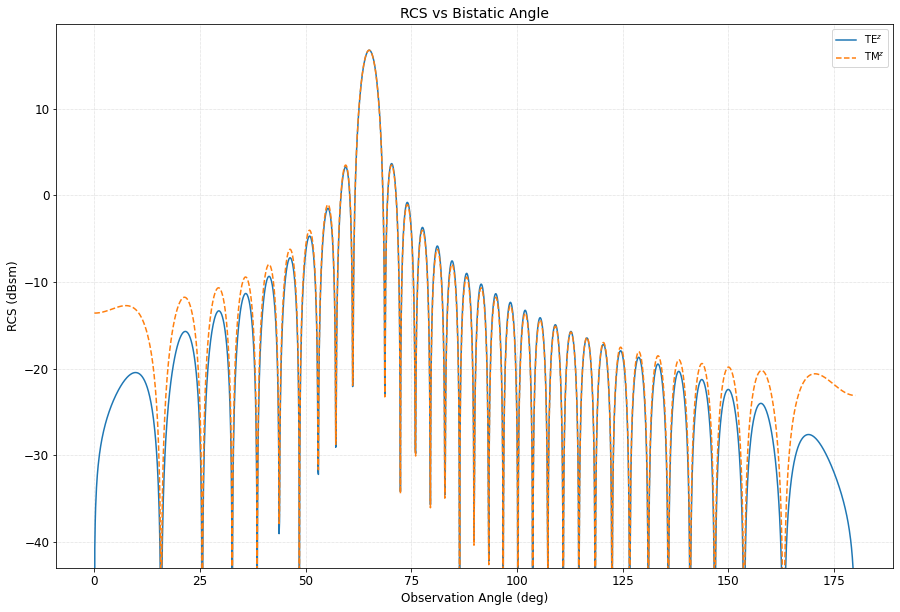

In [5]:
from matplotlib import pyplot as plt

from numpy import log10


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(observation_angle, 10 * log10(rcs_te + 1e-10), '', label='TE$^z$')

plt.plot(observation_angle, 10 * log10(rcs_tm + 1e-10), '--', label='TM$^z$')



# Set the plot title and labels

plt.title('RCS vs Bistatic Angle', size=14)

plt.ylabel('RCS (dBsm)', size=12)

plt.xlabel('Observation Angle (deg)', size=12)

plt.ylim(min(10 * log10(rcs_te + 1e-4)) - 3, max(10 * log10(rcs_te + 1e-4)) + 3)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the legend

plt.legend(loc='upper right', prop={'size': 10})